# Overview

This dataset of NBA team stats from 2014 to 2018 was originally scraped from Basketball Reference and uploaded to Kaggle. Kaggle is an online community of data scientists. It is a subsidiary of Google. The url is provided below.

https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018

The main goal is to model the relationship between team points and percentages for field goals, free throws, and three point shots. In addition, offensive rebounds, total team rebounds, assists, steals, blocks, turnovers, and total fouls will be included in the model. Therefore, the supervised learning method will be implemented using the linear regression.

The Oklahoma City Thunder will be the sample team of this analysis.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV file
game = pd.read_csv('nba.games.stats.csv', sep=',', index_col = 'Unnamed: 0')

In [3]:
# Exploring the Data
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 1 to 82119
Data columns (total 40 columns):
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds                 9840 non-null int64
TotalRebounds    

In [4]:
# Checking only the top 5 rows of the data
game.head()

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,...,27,33,0.818,16,48,26,13,9,9,22
2,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,...,18,21,0.857,11,44,25,5,5,18,26
3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,...,27,38,0.711,11,50,25,7,9,19,15
4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,...,20,27,0.741,11,51,31,6,7,19,30
5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,...,8,11,0.727,13,44,26,2,6,15,29


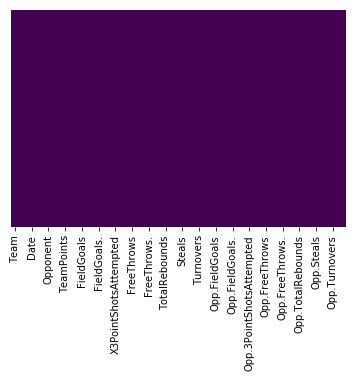

In [5]:
# Checking for any missing values
sns.heatmap(game.isnull(), yticklabels=False, cbar=False, cmap='viridis')

So far, no missing values. We will now check out the correlations between these variables.

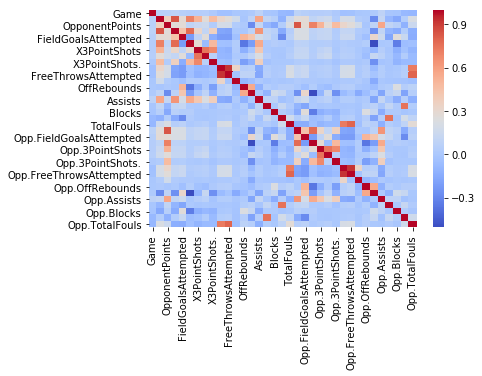

In [6]:
# Correlation heatmap
sns.heatmap(game.corr(), cmap='coolwarm')

Now, we pull out data for the Oklahoma City Thunder.

In [7]:
okc = game[game['Team']=='OKC']

In [8]:
okc.head()

,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
1104,OKC,1,2014-10-29,Away,POR,L,89,106,33,81,...,17,22,0.773,13,42,23,4,9,10,19
2104,OKC,2,2014-10-30,Away,LAC,L,90,93,28,65,...,18,25,0.720,14,33,17,10,4,11,27
3104,OKC,3,2014-11-01,Home,DEN,W,102,91,37,80,...,14,20,0.700,11,41,19,4,10,17,26
4104,OKC,4,2014-11-03,Away,BRK,L,85,116,32,82,...,17,19,0.895,9,42,25,11,3,8,21
5104,OKC,5,2014-11-04,Away,TOR,L,88,100,34,65,...,28,33,0.848,12,39,23,6,3,10,24


Regular season records for the Thunder over 4 seasons.

Next, we'll perform exploratory data analysis to see the relationship among the variables that influence the team points.

/Users/bendo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


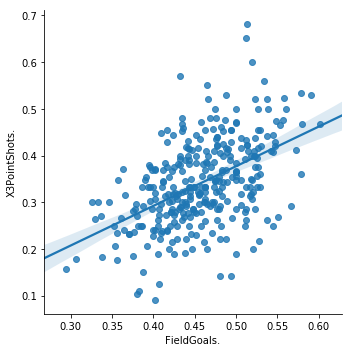

In [9]:
sns.lmplot(x='FieldGoals.', y='X3PointShots.', data=okc)

Here, we are looking at field goal percentage and 3-point percentage. 

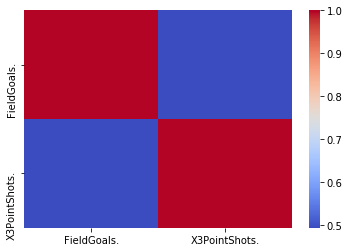

In [10]:
sns.heatmap(okc[['FieldGoals.','X3PointShots.']].corr(), cmap='coolwarm')

Correlation is roughly around 0.5 for Field Goal percentage and 3-point percentage. 

In [12]:
okc['X3PointShots.'].describe()

count    328.000000
mean       0.341122
std        0.093227
min        0.091000
25%        0.280000
50%        0.333000
75%        0.406250
max        0.682000
Name: X3PointShots., dtype: float64

Over 4 regular seasons, the Thunder averaged 34.1% from the three. Their highest was 68.2% and their lowest was 9.1%.

In [13]:
okc['FieldGoals.'].describe()

count    328.000000
mean       0.457527
std        0.054183
min        0.294000
25%        0.421750
50%        0.458000
75%        0.495000
max        0.602000
Name: FieldGoals., dtype: float64

As for their field goal percentage, OKC averaged 45.8%. Their highest percentage was 60.2% from the field.

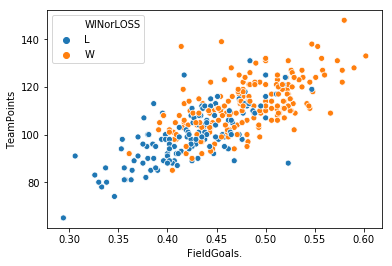

In [14]:
sns.scatterplot(x='FieldGoals.', y='TeamPoints', data=okc, hue='WINorLOSS')

OKC tends to win more games when they shoot over 45% from the field scoring over 100 points.

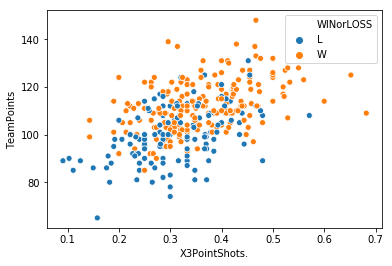

In [15]:
sns.scatterplot(x='X3PointShots.', y='TeamPoints', data=okc, hue='WINorLOSS')

For their 3-point percentage, shooting at least 35% has helped OKC win more games. 

In [17]:
okc['FreeThrows.'].describe()

count    328.000000
mean       0.747345
std        0.111122
min        0.167000
25%        0.688000
50%        0.758000
75%        0.824000
max        1.000000
Name: FreeThrows., dtype: float64

Averaged 74% of their free throws. 

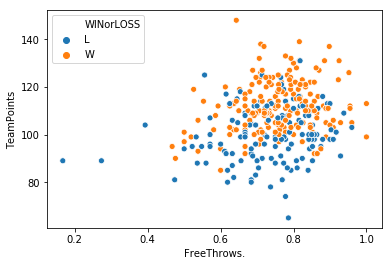

In [16]:
sns.scatterplot(x='FreeThrows.', y='TeamPoints', data=okc, hue='WINorLOSS')

Most of their wins also came from shooting over 68% from the free throw line. 

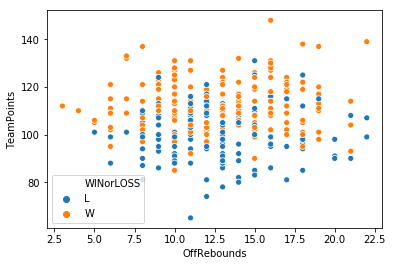

In [19]:
sns.scatterplot(x='OffRebounds', y='TeamPoints', hue='WINorLOSS', data=okc)

Offensive rebounds were another area the Thunder excelled at. They were one of the league leaders in rebounds. Securing more offensive rebounds led to second chance points.

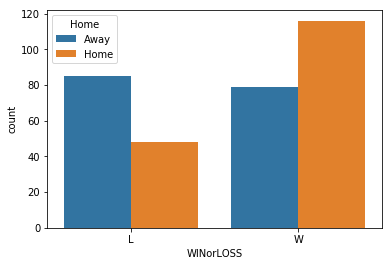

In [20]:
sns.countplot(x='WINorLOSS', data=okc, hue='Home')

Over the span of four seasons, the Thunder won more games at home than on the road.

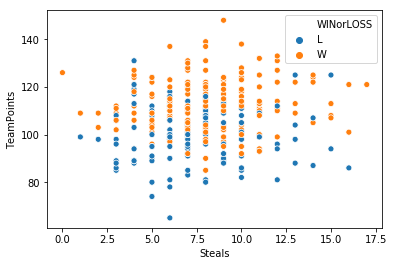

In [22]:
sns.scatterplot(x='Steals', y='TeamPoints', data=okc, hue='WINorLOSS')

As for steals, recording over 5 steals play another factor for team points and recording wins.

# Supervised Learning: Linear Regression
We will use the linear regression to see how team points are associated with field goal percentage, 3-point percentage, free throw percentage, assists, steals, offensive rebounds, total rebounds, blocks, turnovers, and total fouls.

In [23]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
okc.columns

Index(['Team', 'Game', 'Date', 'Home', 'Opponent', 'WINorLOSS', 'TeamPoints',
       'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted', 'FieldGoals.',
       'X3PointShots', 'X3PointShotsAttempted', 'X3PointShots.', 'FreeThrows',
       'FreeThrowsAttempted', 'FreeThrows.', 'OffRebounds', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls',
       'Opp.FieldGoals', 'Opp.FieldGoalsAttempted', 'Opp.FieldGoals.',
       'Opp.3PointShots', 'Opp.3PointShotsAttempted', 'Opp.3PointShots.',
       'Opp.FreeThrows', 'Opp.FreeThrowsAttempted', 'Opp.FreeThrows.',
       'Opp.OffRebounds', 'Opp.TotalRebounds', 'Opp.Assists', 'Opp.Steals',
       'Opp.Blocks', 'Opp.Turnovers', 'Opp.TotalFouls'],
      dtype='object')

In [25]:
X = okc[[ 'FieldGoals.', 'X3PointShots.', 'FreeThrows.', 'OffRebounds', 'TotalRebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'TotalFouls']]

In [26]:
y = okc['TeamPoints']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                    random_state=101)

Splitting the data into training set and test set.

In [28]:
# Standardization
from sklearn.preprocessing import StandardScaler
StandardScaler()
sc_X = StandardScaler()

In [29]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/Users/bendo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/bendo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/bendo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Standardizing the data.

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Training/fitting the linear model on the train data.

In [31]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 8.75435912  2.64287662  1.96040712  2.45289104  2.50157597  0.66749297
  1.67334261 -0.8634301  -2.84597092  2.5281743 ]


We now make our predictions on the test data.

In [32]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

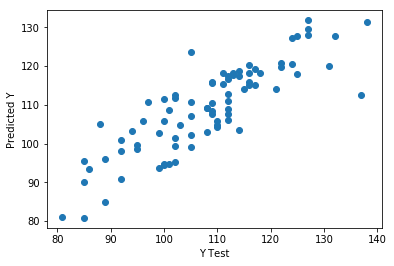

In [33]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [34]:
# Model Evaluation
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.25563544265478
MSE: 45.32823482165288
RMSE: 6.732624660684188


/Users/bendo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


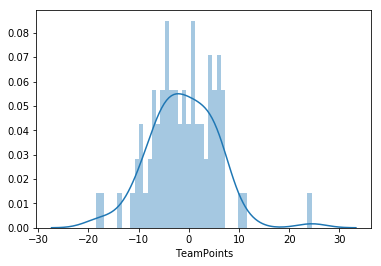

In [35]:
sns.distplot((y_test-predictions),bins=50)

This is our residual histogram. Our normal distribution of team points between -10 and 5.

Coefficients are listed below.

In [37]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
FieldGoals.,8.754359
X3PointShots.,2.642877
FreeThrows.,1.960407
OffRebounds,2.452891
TotalRebounds,2.501576
Assists,0.667493
Steals,1.673343
Blocks,-0.863430
Turnovers,-2.845971
TotalFouls,2.528174


A one unit increase in field goals percentage is associated with an increase of 8.75 points. For 3-point percentage, it is associated with an increase of 2.64 points. As for free throws percentage and offensive rebounds, they associated respectively with an increase 1.96 points and 2.45 points. Increasing total rebounds by one unit also associated with an additional 2.5 points. As for steals, it is associated with an increase of 1.67 points.

What does that all mean? Focusing on the top six areas give the Oklahoma City Thunder more opportunities to increase their team scoring for each game which could also translate into wins. Getting more steals from the opponent also open up opportunities to score.